In [1]:
import os
import cv2 as cv
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

In [2]:
dys_files_path = 'data/dys'
non_dys_files_path = 'data/not_dys'
files_dys = [os.path.join(t[0], f) for t in os.walk(dys_files_path) for f in t[2] if f.endswith('jpg')]
files_non_dys = [os.path.join(t[0], f) for t in os.walk(non_dys_files_path) for f in t[2] if f.endswith('jpg')]
print(f'dys files_len: {len(files_dys)}')
print(f'non dys files_len: {len(files_non_dys)}')

dys files_len: 6
non dys files_len: 11


data/dys/София Шуранова, Ж24/written_text_sofi.jpg
(1119, 789, 3)


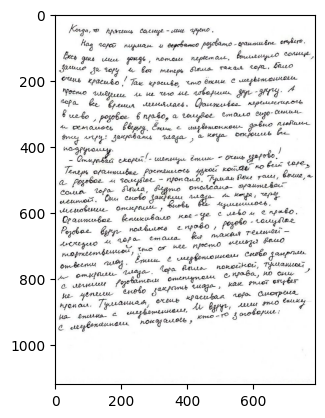

In [3]:
fid = 0
path = files_dys[fid]
#path = 'data/photo_2023-02-20_21-12-48.jpg'
print(path)
img = cv.imread(path)
print(img.shape)
plt.imshow(img)
plt.show()

In [4]:
crops = []
px_means = []
crop_coords = []
step_x, step_y = (40, 40)
crop_h, crop_w = (224, 224)
img_h, img_w, _ = img.shape
x, y = (0, 0)
while img_h - y >= crop_h:
    while img_w - x >= crop_w:
        crop = img[y:y+crop_w, x:x+crop_h]
        px_means.append(crop.mean())
        crop_coords.append((x, y))
        crops.append(crop)
        x += step_x
    y += step_y
    x = 0
print(len(crops))

345


In [5]:
max_mean = np.percentile(px_means, 95)
print(max_mean)

243.00707908163264


In [6]:
max_mean = st.norm.interval(alpha=.95, loc=np.mean(px_means), scale=st.sem(px_means))[1]
print(max_mean)

230.87259946029516


/tmp/ipykernel_110769/3917109063.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  max_mean = st.norm.interval(alpha=.95, loc=np.mean(px_means), scale=st.sem(px_means))[1]


In [7]:
f_idx = np.where(px_means <= max_mean)[0]
print(len(f_idx))

230


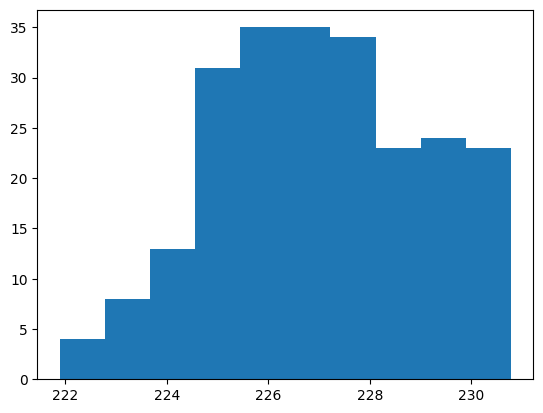

In [8]:
plt.hist(np.asarray(px_means)[f_idx])
plt.show()

In [9]:
crops = np.asarray(crops)[f_idx]
crop_coords = np.asarray(crop_coords)[f_idx]

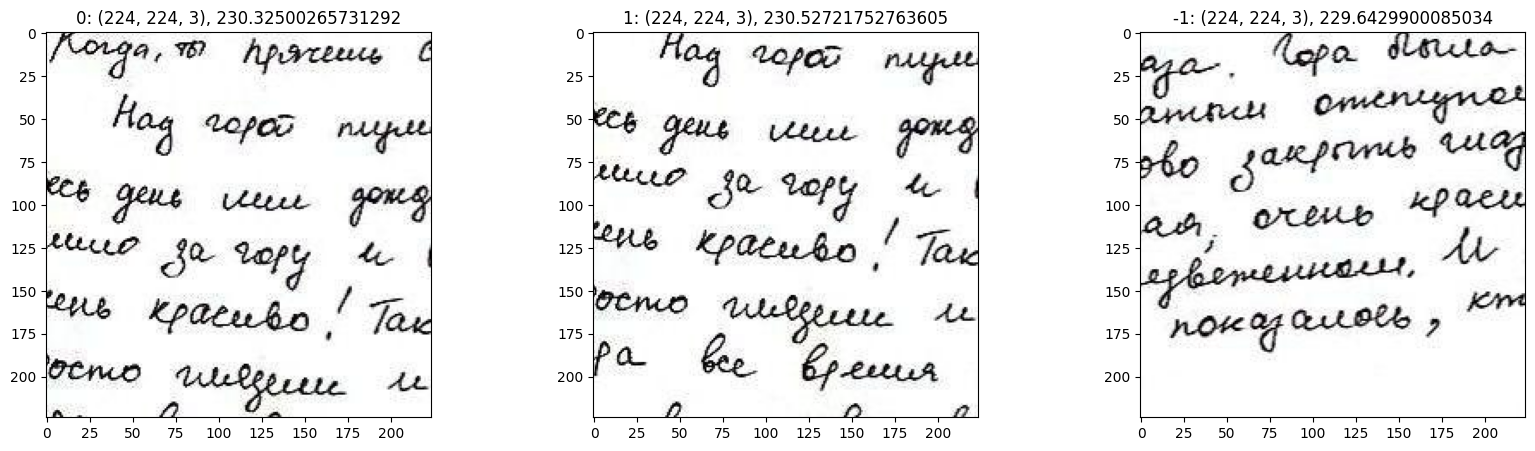

In [10]:
_, axs = plt.subplots(1, 3, figsize=(20, 5))
for n, n_crop in enumerate([0, 1, -1]):
    axs[n].imshow(crops[n_crop])
    axs[n].set_title(f'{n_crop}: {crops[n_crop].shape}, {crops[n_crop].mean()}')
plt.show()

(1119, 789, 3)


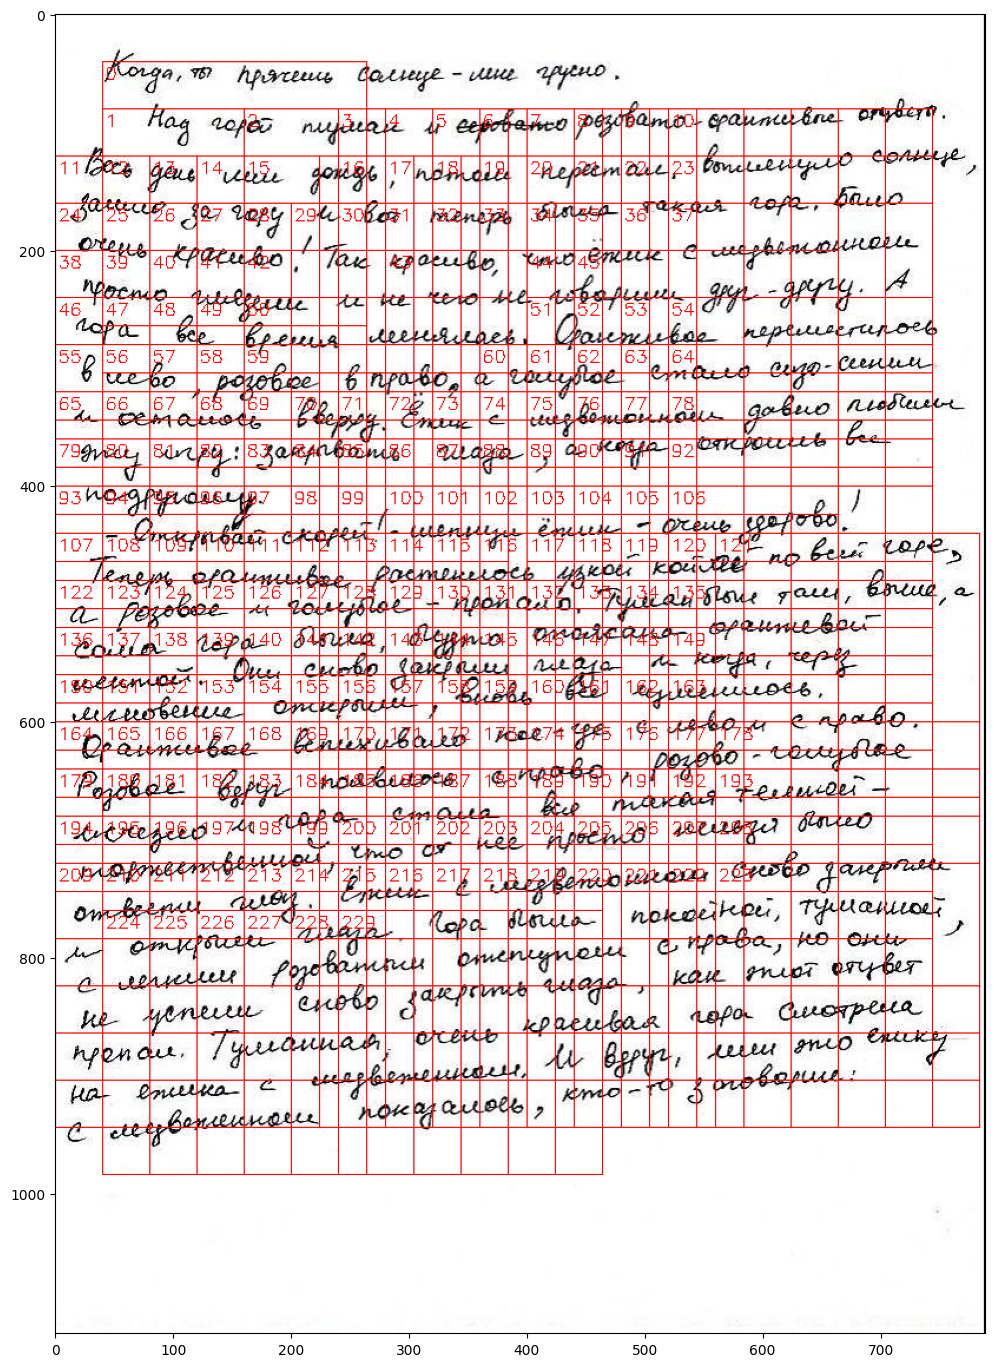

In [11]:
img_2 = img.copy()#np.zeros(img.shape[:2])
print(img_2.shape)
for c, (x, y) in enumerate(crop_coords):
    cv.rectangle(img_2, (x, y), (x+crop_h, y+crop_w), color=[255,0,0])
    cv.putText(img_2, str(c), (x+2, y+15), cv.FONT_HERSHEY_SIMPLEX, .5, color=[255,0,0])
plt.figure(figsize=(12, 20))
plt.imshow(img_2)
plt.show()